In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   11751 non-null  int64  
 1   open                   11751 non-null  float64
 2   high                   11751 non-null  float64
 3   low                    11751 non-null  float64
 4   close                  11751 non-null  float64
 5   PlotCandle (Open)      11751 non-null  float64
 6   PlotCandle (High       11751 non-null  float64
 7   PlotCandle (Low)       11751 non-null  float64
 8   PlotCandle (Close)     11751 non-null  float64
 9   VWAP                   11751 non-null  float64
 10  Upper Band #1          11751 non-null  float64
 11  Lower Band #1          11751 non-null  float64
 12  Upper Band #2          11751 non-null  float64
 13  Lower Band #2          11751 non-null  float64
 14  Upper Band #3          11751 non-null  float64
 15  Lo

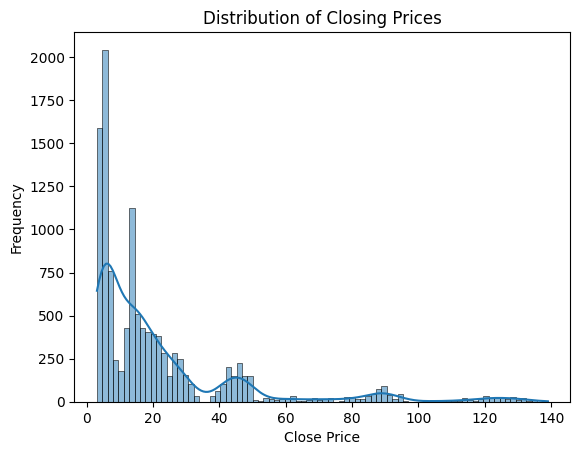

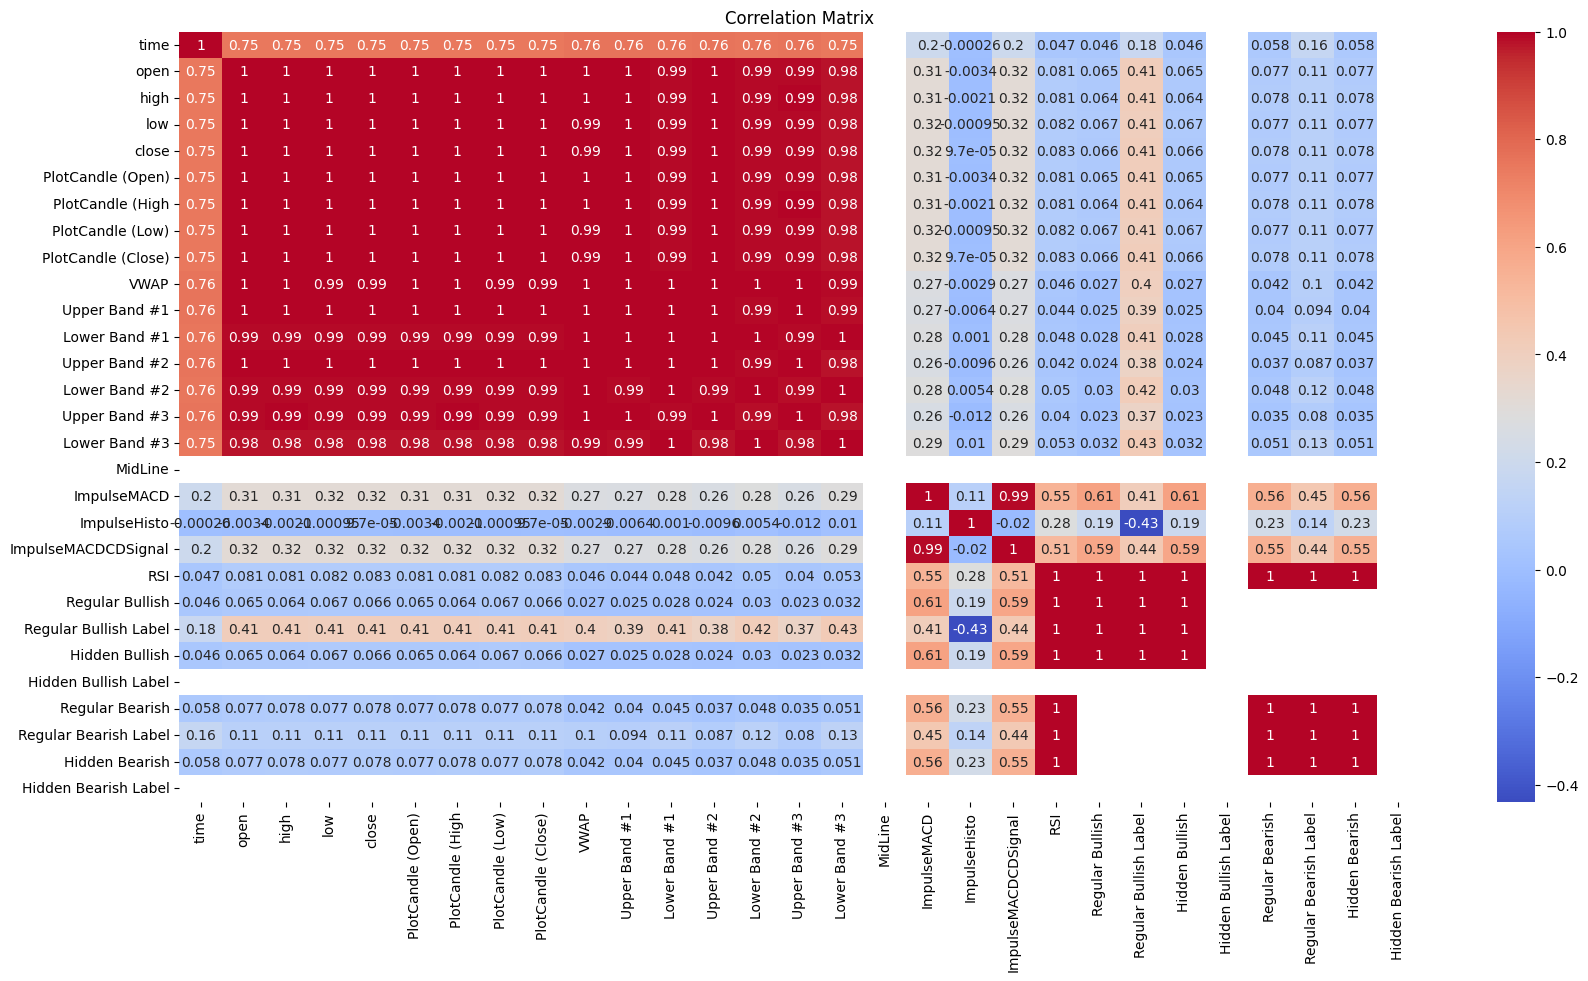

In [2]:
# Load the data
file_path = "/workspaces/ADS-504-02-Group-7-Machine-Learning-and-Deep-Learning-for-Data-Science/nvda_2018.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plot the distribution of the target variable (assuming 'Close' is the target)
sns.histplot(data["close"], kde=True)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Calculate and display correlations
corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [3]:
# Correct column names as per the screenshot
correct_column_names = [
    "time",
    "open",
    "high",
    "low",
    "close",
    "PlotCandle (Open)",
    "PlotCandle (High)",
    "PlotCandle (Low)",
    "PlotCandle (Close)",
    "VWAP",
    "Upper Band #1",
    "Lower Band #1",
    "Upper Band #2",
    "Lower Band #2",
    "Upper Band #3",
    "Lower Band #3",
    "MidLine",
    "ImpulseMACD",
    "ImpulseHisto",
    "ImpulseMACDSignal",
    "RSI",
    "Regular Bullish Label",
    "Regular Bullish",
    "Hidden Bullish Label",
    "Hidden Bullish",
    "Regular Bearish Label",
    "Regular Bearish",
    "Hidden Bearish Label",
    "Hidden Bearish",
]
data.columns = correct_column_names

# Drop the specified columns
columns_to_remove = [
    "Regular Bullish",
    "Regular Bullish Label",
    "Hidden Bullish",
    "Hidden Bullish Label",
    "Regular Bearish",
    "Regular Bearish Label",
    "Hidden Bearish",
    "Hidden Bearish Label",
]
data = data.drop(columns=columns_to_remove)

# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                11751 non-null  int64  
 1   open                11751 non-null  float64
 2   high                11751 non-null  float64
 3   low                 11751 non-null  float64
 4   close               11751 non-null  float64
 5   PlotCandle (Open)   11751 non-null  float64
 6   PlotCandle (High)   11751 non-null  float64
 7   PlotCandle (Low)    11751 non-null  float64
 8   PlotCandle (Close)  11751 non-null  float64
 9   VWAP                11751 non-null  float64
 10  Upper Band #1       11751 non-null  float64
 11  Lower Band #1       11751 non-null  float64
 12  Upper Band #2       11751 non-null  float64
 13  Lower Band #2       11751 non-null  float64
 14  Upper Band #3       11751 non-null  float64
 15  Lower Band #3       11751 non-null  float64
 16  MidL

In [4]:
# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
data.fillna(method="ffill", inplace=True)

# Extract features and target variable
X = data.drop(columns=["close"])
y = data["close"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                11751 non-null  int64  
 1   open                11751 non-null  float64
 2   high                11751 non-null  float64
 3   low                 11751 non-null  float64
 4   close               11751 non-null  float64
 5   PlotCandle (Open)   11751 non-null  float64
 6   PlotCandle (High)   11751 non-null  float64
 7   PlotCandle (Low)    11751 non-null  float64
 8   PlotCandle (Close)  11751 non-null  float64
 9   VWAP                11751 non-null  float64
 10  Upper Band #1       11751 non-null  float64
 11  Lower Band #1       11751 non-null  float64
 12  Upper Band #2       11751 non-null  float64
 13  Lower Band #2       11751 non-null  float64
 14  Upper Band #3       11751 non-null  float64
 15  Lower Band #3       11751 non-null  float64
 16  MidL

/tmp/ipykernel_20015/4014895030.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
# Drop columns with high correlation (keep only one of the highly correlated features)
data = data.drop(
    columns=[
        "high",
        "low",
        "PlotCandle (Open)",
        "PlotCandle (High)",
        "PlotCandle (Low)",
        "PlotCandle (Close)",
    ]
)

# Handle missing values
data.fillna(method="ffill", inplace=True)

# Extract features and target variable
X = data.drop(columns=["close"])
y = data["close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/tmp/ipykernel_20015/1070634165.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Linear Regression MSE: 0.10465470878629413, R2: 0.9998226186469621
Random Forest MSE: 0.08471999523083144, R2: 0.9998564063905228


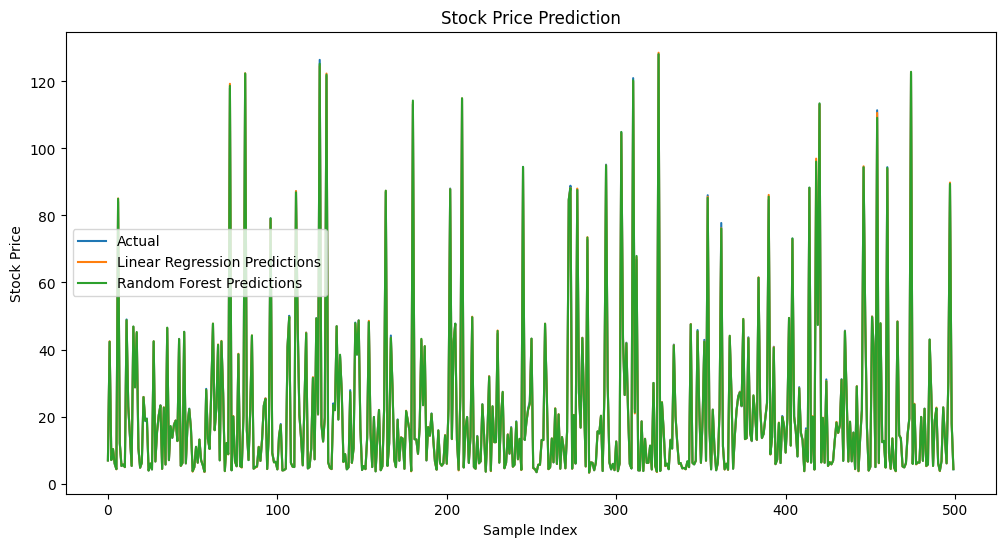

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Linear Regression MSE: {lr_mse}, R2: {lr_r2}")
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(
    y_test.values[:500], label="Actual"
)  # Limiting to first 500 samples for better visualization
plt.plot(lr_predictions[:500], label="Linear Regression Predictions")
plt.plot(rf_predictions[:500], label="Random Forest Predictions")
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.show()

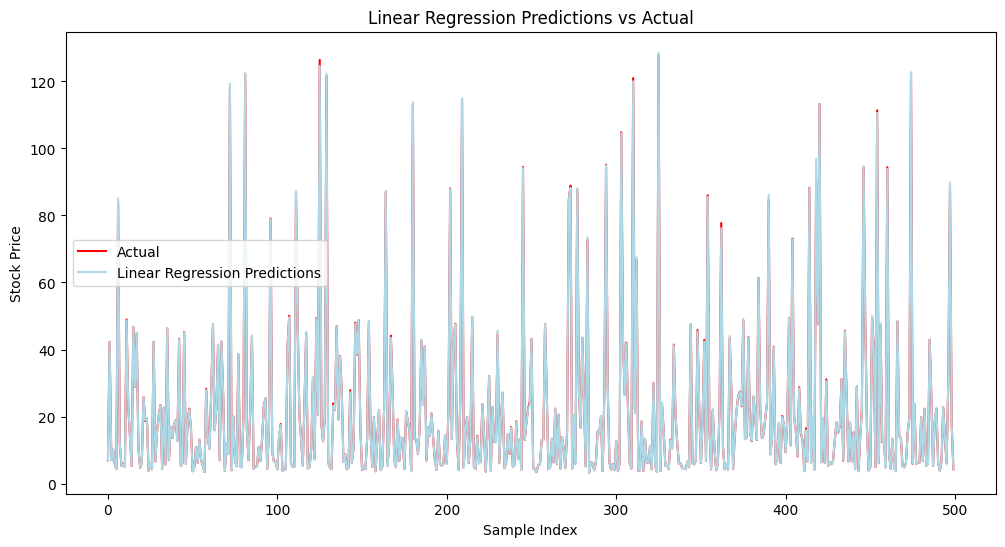

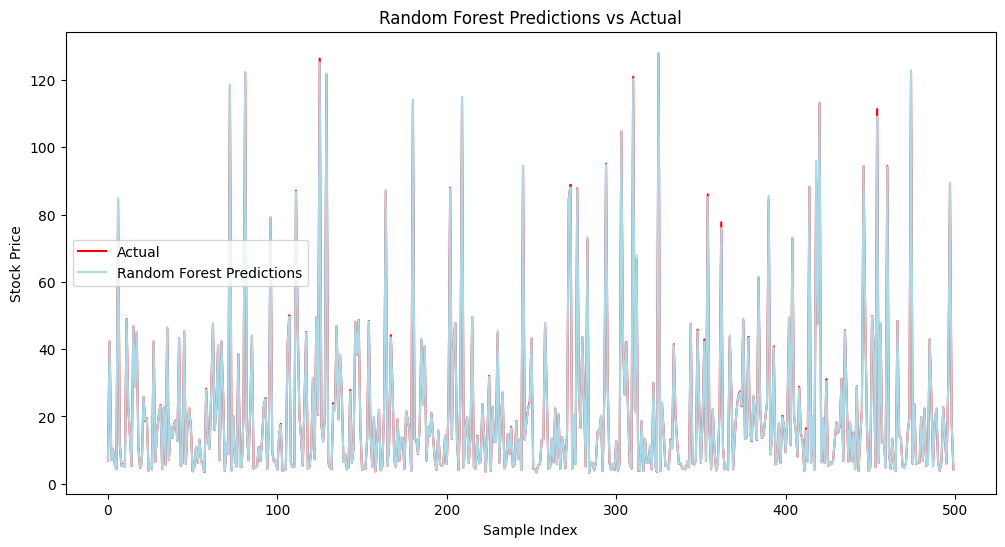

In [13]:
# Separate plots for clearer comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:500], label="Actual", color="red")
plt.plot(lr_predictions[:500], label="Linear Regression Predictions", color="lightblue")
plt.legend()
plt.title("Linear Regression Predictions vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:500], label="Actual", color="red")
plt.plot(rf_predictions[:500], label="Random Forest Predictions", color="lightblue")
plt.legend()
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.show()